<a href="https://colab.research.google.com/github/Negin1164/Data-Analysis-with-Python/blob/main/Stock_Market_Data_Analysis_Github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Stock Analysis of Netflix, Amazon, Google** 

Historic stock price data of three companies including Amazon, Google and Netflix is fetched from Yahoo finance and analyzed leveraging Python libraries' functionalities. Ultimately, The performance of companies are compared by analyzing their return.  

### **Table of contents:** 

1. [Importing libraries](#lib) <br>
2. [Fetching historical and up-to-date stock price Data of Amazon, Google and Netflix](#dataset) <br>
3. [Exploring the data](#EDA) <br>
4. [Data visualization](#visI) <br> 
   4.1. [Comparing the stock price data trend of companies for each stock price feature from Aug 19, 2004 to Jun 16, 2022](#trend) <br>
   4.2. [Comparing the trend of stock price features of each company and calculating their moving average](#moving_ave)<br>
   4.3. [Comparing the maximum adjusted closing price of Google, Amazon and Netflix during February 2022](#max_adj)<br>

5. [Daily percentage return and volatility](#risk_assessment)<br>
   5.1. [Daily percentage return](#daily_return) <br>
   5.2. [Daily volatility](#volatility) <br>
   5.3. [Cumulative sum of daily pecentage return](#cumsum_daily_return)<br>

6. [Correlation between daily return of Amazon, Netflix and Google as well as their adjusted closing price](#Corr) <br>

7. [Return of Investment](#ROI) <br>
   7.1. [Return of investment calculator](#ROI_calculator) <br>
   7.2. [Comparing the Return of investment of Amazon, Neflix and Google](#ROI_Comparison) <br>








## **1. Importing libraries**
<a name = 'lib'></a>


The analysis is performed leveraging several Pyhton libraries and their functionalities. The libraries are listed below

1. pandas_datareader is used for fetching data from Yahoo finance and convert it to a dataframe.
2. pandas library functions and methods are using for exploring the dataframe. This library is also used for visualizing the data.
3. matplotlib is used for visualization purpose such as creating figures and handling the figure appearnce and features.
4. seaborn which is built on the top of matplotlib is used for creating plots with less complex algorithms.
5. numpy library along with pandas is used for exploring and slicing the data.
6. datetime; Since the data is a timeseries data, the functionalities of datetime library along with pandas library are used for resampling the data.

In [341]:
!pip install --upgrade pandas
!pip install --upgrade pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [342]:
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
from datetime import datetime

## **1. Fetching historical and up-to-date stock price Data**
<a name = 'dataset'></a>

The data is fetched form [Yahoo fincance](https://finance.yahoo.com) and contains the stock price of Netflix, Amazon and Google from the earliest day available upto today (Jun 15, 2022). <br>


Note that, The fetched data used for analysis contains the stock price from Aug 19, 2004 to Jun 15 2022. For each recorded date, and each company, data provides several features including, Open, Close, Adj Close, High, Low, Volume. Each feature is descibed briefly in the following: <br>

**Open:** The price of the stock when the market opens in the morning <br>
**Close:** The price of the stock when the market closes in the evening <br>
**High:** Highest price the stock reached during a day <br>
**Low:** Lowest price the stock reached during a day <br>
**Volume:** The volume in each day provides the total amount of stocks traded on that day. <br>
**Adj Close:** The adjusted closing price factors in anything that might affect the stock price after the market closes. Adjusted closing prices make it easier to evaluate stock performance. <br>

In [343]:
df = pdr.DataReader(['GOOG','AMZN','NFLX'], 'yahoo', start='1997-01-01', end=datetime.today())

**List of columns headers:**

In [344]:
dict(df.columns).keys()

dict_keys(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'])

**For each company the above stock price features (Open, Close, Adj Close, High, Low, Volume) are provided.**

In [345]:
df.columns.to_list()

[('Adj Close', 'GOOG'),
 ('Adj Close', 'AMZN'),
 ('Adj Close', 'NFLX'),
 ('Close', 'GOOG'),
 ('Close', 'AMZN'),
 ('Close', 'NFLX'),
 ('High', 'GOOG'),
 ('High', 'AMZN'),
 ('High', 'NFLX'),
 ('Low', 'GOOG'),
 ('Low', 'AMZN'),
 ('Low', 'NFLX'),
 ('Open', 'GOOG'),
 ('Open', 'AMZN'),
 ('Open', 'NFLX'),
 ('Volume', 'GOOG'),
 ('Volume', 'AMZN'),
 ('Volume', 'NFLX')]

In [346]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6316 entries, 1997-05-15 to 2022-06-17
Columns: 18 entries, ('Adj Close', 'GOOG') to ('Volume', 'NFLX')
dtypes: float64(18)
memory usage: 937.5 KB


## **2. Exploring the data** 
<a name = 'EDA'></a>

**Displaying all stock price features in the first 10 earliest days.**

In [347]:
df.head(n=10)

Attributes Adj Close                Close                High                 \
Symbols         GOOG      AMZN NFLX  GOOG      AMZN NFLX GOOG      AMZN NFLX   
Date                                                                           
1997-05-15       NaN  0.097917  NaN   NaN  0.097917  NaN  NaN  0.125000  NaN   
1997-05-16       NaN  0.086458  NaN   NaN  0.086458  NaN  NaN  0.098958  NaN   
1997-05-19       NaN  0.085417  NaN   NaN  0.085417  NaN  NaN  0.088542  NaN   
1997-05-20       NaN  0.081771  NaN   NaN  0.081771  NaN  NaN  0.087500  NaN   
1997-05-21       NaN  0.071354  NaN   NaN  0.071354  NaN  NaN  0.082292  NaN   
1997-05-22       NaN  0.069792  NaN   NaN  0.069792  NaN  NaN  0.072396  NaN   
1997-05-23       NaN  0.075000  NaN   NaN  0.075000  NaN  NaN  0.076042  NaN   
1997-05-27       NaN  0.079167  NaN   NaN  0.079167  NaN  NaN  0.082292  NaN   
1997-05-28       NaN  0.076563  NaN   NaN  0.076563  NaN  NaN  0.081771  NaN   
1997-05-29       NaN  0.075260  NaN   NaN  0.075260  NaN  NaN  0.077083  NaN   

Attributes  Low                Open                Volume                     
Symbols    GOOG      AMZN NFLX GOOG      AMZN NFLX   GOOG          AMZN NFLX  
Date                                                                          
1997-05-15  NaN  0.096354  NaN  NaN  0.121875  NaN    NaN  1.443120e+09  NaN  
1997-05-16  NaN  0.085417  NaN  NaN  0.098438  NaN    NaN  2.940000e+08  NaN  
1997-05-19  NaN  0.081250  NaN  NaN  0.088021  NaN    NaN  1.221360e+08  NaN  
1997-05-20  NaN  0.081771  NaN  NaN  0.086458  NaN    NaN  1.093440e+08  NaN  
1997-05-21  NaN  0.068750  NaN  NaN  0.081771  NaN    NaN  3.770640e+08  NaN  
1997-05-22  NaN  0.065625  NaN  NaN  0.071875  NaN    NaN  2.355360e+08  NaN  
1997-05-23  NaN  0.066667  NaN  NaN  0.070313  NaN    NaN  3.187440e+08  NaN  
1997-05-27  NaN  0.072917  NaN  NaN  0.075521  NaN    NaN  1.739520e+08  NaN  
1997-05-28  NaN  0.076563  NaN  NaN  0.081250  NaN    NaN  9.148800e+07  NaN  
1997-05-29  NaN  0.073958  NaN  NaN  0.077083  NaN    NaN  6.945600e+07  NaN

In the first rows of the above data frame (dating back to Jun 15, 1997), there is only data available for Amazon and there is no data for Google and Netflix since they were founded few years after Amazon. In this analysis, after exploring the data, for the sake of comparison, we consider dates when data is available for all 3 companies<br>

[Amazon](https://en.wikipedia.org/wiki/Amazon_(company)) is founded in July 5, 1994 <br>

[Netflix](https://en.wikipedia.org/wiki/Netflix) is founded in August 29, 1997 <br>

[Google](https://en.wikipedia.org/wiki/Google) is founded in September 4, 1998. <br>

**Displaying the stock price data of the most 10 recent days.**

In [348]:
display(df.tail(10))

Attributes    Adj Close                                Close              \
Symbols            GOOG        AMZN        NFLX         GOOG        AMZN   
Date                                                                       
2022-06-06  2340.209961  124.790001  197.139999  2340.209961  124.790001   
2022-06-07  2344.590088  123.000000  198.610001  2344.590088  123.000000   
2022-06-08  2344.760010  121.180000  202.830002  2344.760010  121.180000   
2022-06-09  2298.360107  116.150002  192.770004  2298.360107  116.150002   
2022-06-10  2228.550049  109.650002  182.940002  2228.550049  109.650002   
2022-06-13  2137.530029  103.669998  169.690002  2137.530029  103.669998   
2022-06-14  2143.879883  102.309998  167.539993  2143.879883  102.309998   
2022-06-15  2207.810059  107.669998  180.110001  2207.810059  107.669998   
2022-06-16  2132.719971  103.660004  173.350006  2132.719971  103.660004   
2022-06-17  2165.800049  106.000000  177.460007  2165.800049  106.000000   

Attributes                     High                                  Low  \
Symbols           NFLX         GOOG        AMZN        NFLX         GOOG   
Date                                                                       
2022-06-06  197.139999  2387.969971  128.990005  203.869995  2330.565918   
2022-06-07  198.610001  2354.972900  124.099998  199.600006  2302.510010   
2022-06-08  202.830002  2372.919922  123.750000  207.380005  2333.935059   
2022-06-09  192.770004  2367.000000  121.300003  201.690002  2297.340088   
2022-06-10  182.940002  2269.939941  114.500000  185.860001  2217.219971   
2022-06-13  169.690002  2184.370117  106.540001  179.089996  2131.760986   
2022-06-14  167.539993  2169.149902  104.879997  172.059998  2127.040039   
2022-06-15  180.110001  2241.260010  109.059998  183.850006  2162.375000   
2022-06-16  173.350006  2185.810059  104.580002  176.270004  2115.850098   
2022-06-17  177.460007  2173.469971  106.980003  179.649994  2113.679932   

Attributes                                 Open                          \
Symbols           AMZN        NFLX         GOOG        AMZN        NFLX   
Date                                                                      
2022-06-06  123.809998  195.380005  2334.850098  125.250000  202.089996   
2022-06-07  120.629997  193.000000  2312.959961  122.010002  194.869995   
2022-06-08  120.750000  197.639999  2337.530029  122.610001  197.949997   
2022-06-09  116.099998  192.539993  2326.830078  119.989998  200.649994   
2022-06-10  109.050003  180.850006  2255.625000  113.419998  182.639999   
2022-06-13  101.860001  168.960007  2148.919922  104.190002  177.070007   
2022-06-14  101.430000  164.279999  2137.800049  104.190002  169.750000   
2022-06-15  103.529999  168.529999  2177.989990  103.860001  169.259995   
2022-06-16  102.010002  171.559998  2162.989990  104.470001  174.000000   
2022-06-17  102.705002  173.339996  2130.699951  102.800003  173.630005   

Attributes     Volume                           
Symbols          GOOG         AMZN        NFLX  
Date                                            
2022-06-06  1189300.0  135269000.0   5372000.0  
2022-06-07  1320700.0   85156700.0   4839500.0  
2022-06-08  1127200.0   64926600.0   7244100.0  
2022-06-09  1157100.0   67029800.0   6949000.0  
2022-06-10  1566200.0   87266000.0  13065600.0  
2022-06-13  1837800.0   99277700.0  10222400.0  
2022-06-14  1274000.0   69728800.0  11555300.0  
2022-06-15  1659600.0   85011100.0  12396000.0  
2022-06-16  1761500.0   82085100.0   8193500.0  
2022-06-17  1094799.0   50112491.0   5185042.0

**displaying stock price of 4 randomly selected days**

In [349]:
df.sample(4, axis=0)

Attributes    Adj Close                               Close             \
Symbols            GOOG       AMZN        NFLX         GOOG       AMZN   
Date                                                                     
2002-07-18          NaN   0.777500    1.149286          NaN   0.777500   
2016-05-23   704.239990  34.837502   94.889999   704.239990  34.837502   
2004-07-23          NaN   1.999000    2.895714          NaN   1.999000   
2018-10-08  1148.969971  93.221001  349.100006  1148.969971  93.221001   

Attributes                     High                                 Low  \
Symbols           NFLX         GOOG       AMZN        NFLX         GOOG   
Date                                                                      
2002-07-18    1.149286          NaN   0.829500    1.166429          NaN   
2016-05-23   94.889999   711.478027  35.299999   95.290001   704.179993   
2004-07-23    2.895714          NaN   2.138000    2.928571          NaN   
2018-10-08  349.100006  1168.000000  95.099998  352.950012  1127.364014   

Attributes                                Open                         \
Symbols          AMZN        NFLX         GOOG       AMZN        NFLX   
Date                                                                    
2002-07-18   0.776500    1.110714          NaN   0.796000    1.117143   
2016-05-23  34.820999   92.849998   706.530029  35.212502   92.980003   
2004-07-23   1.978000    2.835714          NaN   2.123500    2.877143   
2018-10-08  91.532997  338.109985  1150.109985  93.699997  345.179993   

Attributes     Volume                           
Symbols          GOOG         AMZN        NFLX  
Date                                            
2002-07-18        NaN  137134000.0   2899400.0  
2016-05-23  1330700.0   51902000.0  13992300.0  
2004-07-23        NaN  718544000.0  14597100.0  
2018-10-08  1932400.0  147864000.0  12375500.0

**The earliest date for which the Netflix data is available is May 23, 2002** <br> (see the following data frame). 

In [350]:
df[~df.xs(key='NFLX', level = 1, axis=1).isnull().all(axis=1)].head()

Attributes Adj Close                   Close                   High          \
Symbols         GOOG    AMZN      NFLX  GOOG    AMZN      NFLX GOOG    AMZN   
Date                                                                          
2002-05-23       NaN  0.9725  1.196429   NaN  0.9725  1.196429  NaN  0.9775   
2002-05-24       NaN  0.9735  1.210000   NaN  0.9735  1.210000  NaN  0.9845   
2002-05-28       NaN  0.9530  1.157143   NaN  0.9530  1.157143  NaN  0.9805   
2002-05-29       NaN  0.9455  1.103571   NaN  0.9455  1.103571  NaN  0.9550   
2002-05-30       NaN  0.9185  1.071429   NaN  0.9185  1.071429  NaN  0.9470   

Attributes            Low                   Open                   Volume  \
Symbols         NFLX GOOG    AMZN      NFLX GOOG    AMZN      NFLX   GOOG   
Date                                                                        
2002-05-23  1.242857  NaN  0.9305  1.145714  NaN  0.9420  1.156429    NaN   
2002-05-24  1.225000  NaN  0.9530  1.197143  NaN  0.9700  1.214286    NaN   
2002-05-28  1.232143  NaN  0.9385  1.157143  NaN  0.9785  1.213571    NaN   
2002-05-29  1.164286  NaN  0.9400  1.085714  NaN  0.9410  1.164286    NaN   
2002-05-30  1.107857  NaN  0.9040  1.071429  NaN  0.9350  1.107857    NaN   

Attributes                            
Symbols            AMZN         NFLX  
Date                                  
2002-05-23  112964000.0  104790000.0  
2002-05-24   85006000.0   11104800.0  
2002-05-28   79066000.0    6609400.0  
2002-05-29   72282000.0    6757800.0  
2002-05-30  148642000.0   10154200.0

**The earliest date for which the Google data is available is Aug 19, 2004**. <br> (see the following data frame). 

In [351]:
df[~df.xs(key='GOOG', level = 1, axis=1).isnull().any(axis=1)].head()

Attributes  Adj Close                        Close                    \
Symbols          GOOG    AMZN      NFLX       GOOG    AMZN      NFLX   
Date                                                                   
2004-08-19  49.982655  1.9315  2.264286  49.982655  1.9315  2.264286   
2004-08-20  53.952770  1.9755  2.262857  53.952770  1.9755  2.262857   
2004-08-23  54.495735  1.9725  2.272857  54.495735  1.9725  2.272857   
2004-08-24  52.239197  1.9525  2.208571  52.239197  1.9525  2.208571   
2004-08-25  52.802086  2.0150  2.238571  52.802086  2.0150  2.238571   

Attributes       High                          Low                    \
Symbols          GOOG    AMZN      NFLX       GOOG    AMZN      NFLX   
Date                                                                   
2004-08-19  51.835709  2.0240  2.307143  47.800831  1.8175  2.200000   
2004-08-20  54.336334  1.9955  2.285714  50.062355  1.9055  2.221429   
2004-08-23  56.528118  2.0000  2.321429  54.321388  1.9555  2.235714   
2004-08-24  55.591629  1.9965  2.302857  51.591621  1.9160  2.178571   
2004-08-25  53.798351  2.0245  2.278571  51.746044  1.9080  2.180000   

Attributes       Open                        Volume                          
Symbols          GOOG    AMZN      NFLX        GOOG         AMZN       NFLX  
Date                                                                         
2004-08-19  49.813290  2.0130  2.274286  44871361.0  253922000.0  5969600.0  
2004-08-20  50.316402  1.9230  2.264286  22942874.0  135816000.0  7652400.0  
2004-08-23  55.168217  1.9945  2.310000  18342897.0  110652000.0  5951400.0  
2004-08-24  55.412300  1.9860  2.275714  15319808.0  152808000.0  7220500.0  
2004-08-25  52.284027  1.9530  2.221429   9232276.0  145096000.0  7523600.0

## **4. Data visualization**
<a name = 'visI'></a> 


### **4.1. Comparing the stock price data trend of companies for each stock price feature from Aug 19, 2004 upto Jun 16, 2022.**
<a name = 'trend'></a>

In [352]:
def vis_plot(Colum_list, trim_by):
    
    """
    vis_plot function, for each feature in the column list, creates the line plots of all companies on a figure.
    - The column list is one or more feature of stock price including Close, Open, Adj Close, High, Low.
    - trim by specifies a company name. The starting date will be the the earliest date for which the given company's data is available.
    
    """    
    N_col = len(Colum_list)
    fig, ax = plt.subplots(1,N_col)
    counter = 0
    for col in Colum_list:
      df_trimed = df[~df.xs(key=trim_by, level = 1, axis=1).isnull().any(axis=1)][col]
      if N_col > 1:
        df_trimed.plot(figsize=(5*N_col,5), ax = ax[counter])
        ax[counter].legend(['Google' , 'Amazon', 'Netflix'], fontsize=16)
        ax[counter].tick_params(axis='both', which='major', labelsize=16)
        ax[counter].set_xlabel('')
        ax[counter].set_title(col + '\n', fontsize=18)
      elif N_col == 1:
        df_trimed.plot(figsize=(10,5), ax = ax) 
        ax.legend(['Google' , 'Amazon', 'Netflix'], fontsize=16)
        ax.tick_params(axis='both', which='major', labelsize=16)
        ax.set_xlabel('')
        ax.set_title(col + '\n', fontsize=18)
      counter += 1
    
    plt.xlim(df_trimed.index[0].date(), df_trimed.index[-1].date())
    plt.tight_layout(pad=0.5)
    plt.show() 

In [353]:
help(vis_plot)

Help on function vis_plot in module __main__:

vis_plot(Colum_list, trim_by)
    vis_plot function, for each feature in the column list, creates the line plots of all companies on a figure.
    - The column list is one or more feature of stock price including Close, Open, Adj Close, High, Low.
    - trim by specifies a company name. The starting date will be the the earliest date for which the given company's data is available.



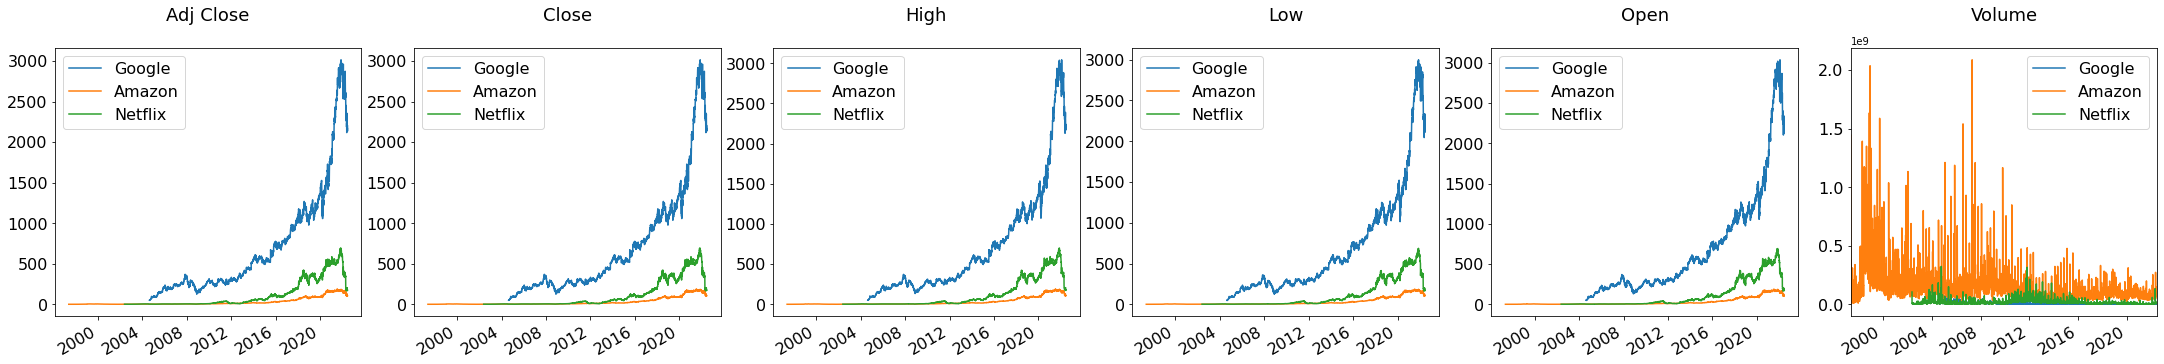

In [354]:
vis_plot(Colum_list = dict(df.columns).keys(), trim_by='AMZN')    

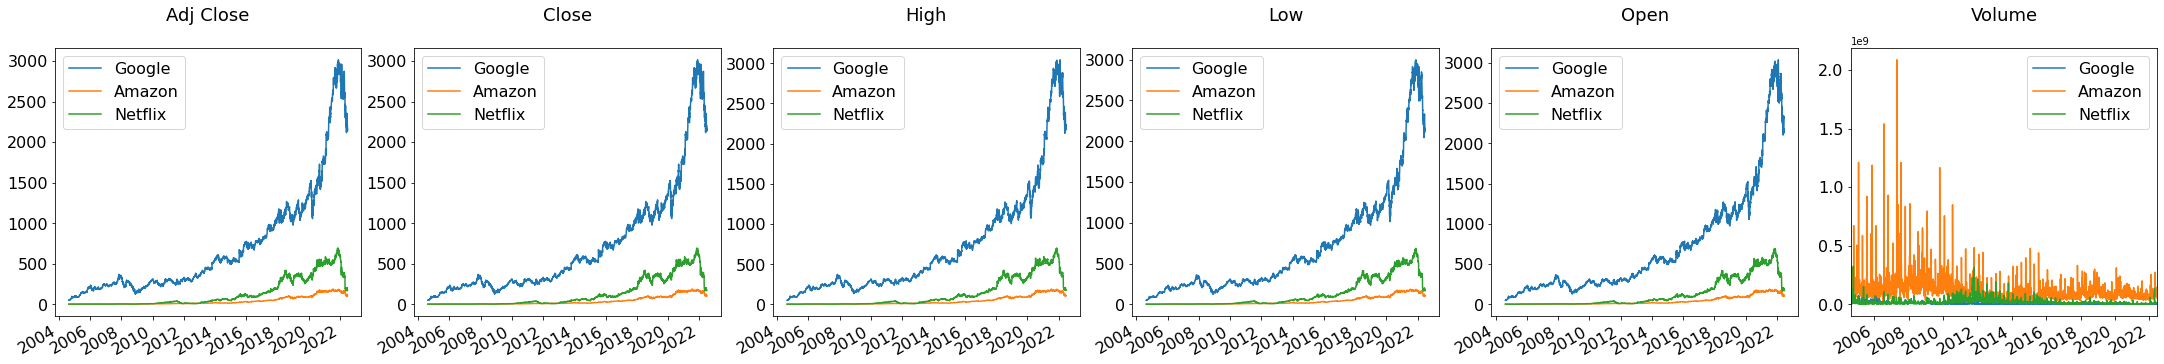

In [355]:
vis_plot(Colum_list = dict(df.columns).keys(), trim_by='GOOG') 

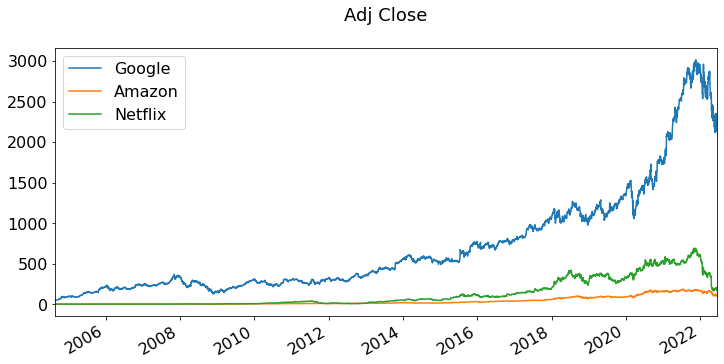

In [356]:
vis_plot(Colum_list = ['Adj Close'], trim_by='GOOG')

**For the rest of analysis, the starting date will be the date when there is data available for all companies**

In [357]:
df = df[~df.isnull().any(axis=1)]
df.head()

Attributes  Adj Close                        Close                    \
Symbols          GOOG    AMZN      NFLX       GOOG    AMZN      NFLX   
Date                                                                   
2004-08-19  49.982655  1.9315  2.264286  49.982655  1.9315  2.264286   
2004-08-20  53.952770  1.9755  2.262857  53.952770  1.9755  2.262857   
2004-08-23  54.495735  1.9725  2.272857  54.495735  1.9725  2.272857   
2004-08-24  52.239197  1.9525  2.208571  52.239197  1.9525  2.208571   
2004-08-25  52.802086  2.0150  2.238571  52.802086  2.0150  2.238571   

Attributes       High                          Low                    \
Symbols          GOOG    AMZN      NFLX       GOOG    AMZN      NFLX   
Date                                                                   
2004-08-19  51.835709  2.0240  2.307143  47.800831  1.8175  2.200000   
2004-08-20  54.336334  1.9955  2.285714  50.062355  1.9055  2.221429   
2004-08-23  56.528118  2.0000  2.321429  54.321388  1.9555  2.235714   
2004-08-24  55.591629  1.9965  2.302857  51.591621  1.9160  2.178571   
2004-08-25  53.798351  2.0245  2.278571  51.746044  1.9080  2.180000   

Attributes       Open                        Volume                          
Symbols          GOOG    AMZN      NFLX        GOOG         AMZN       NFLX  
Date                                                                         
2004-08-19  49.813290  2.0130  2.274286  44871361.0  253922000.0  5969600.0  
2004-08-20  50.316402  1.9230  2.264286  22942874.0  135816000.0  7652400.0  
2004-08-23  55.168217  1.9945  2.310000  18342897.0  110652000.0  5951400.0  
2004-08-24  55.412300  1.9860  2.275714  15319808.0  152808000.0  7220500.0  
2004-08-25  52.284027  1.9530  2.221429   9232276.0  145096000.0  7523600.0

In [358]:
df.isnull().sum().any()

False

**Calculating the number of recorded days in the data**

In [359]:
print((df.index[-1]-df.index[0]).days)

6511


### **4.2. Comparing the trend of stock price features of each company and calculating their moving average**
<a name = 'moving_ave'></a>

In [360]:
def company_features_plot(company_ticker, features):

    """

    company_features_plot function creates a figure of line plots of a company's stock price features 
    i.e. 'Open'/'Close'/'High'/'Low'/'Adj Close'. 
    A given company is specified by its ticker symbol

    ex:  company_features_plot(company_ticker = 'AMZN', features = ['Open'])
    
    """

    fig, ax = plt.subplots(1,1)
    df_0 = df.xs(key=company_ticker,level=1, axis=1)[features]
    df_0.plot(ls='--', figsize=(20,5), ax = ax)
    ax.set_xlabel('\nDate', fontsize=18)
    ax.set_xlim(df_0.index[0].date(),df_0.index[-1].date())
    
    if company_ticker == 'AMZN':
      company_name = 'Amazon'
    elif company_ticker == 'GOOG': 
      company_name = 'Google'
    elif company_ticker == 'NFLX': 
      company_name = 'Netflix'
    ax.set_title(f'{company_name} stock price features - ({df_0.index[0].date()} to {df_0.index[-1].date()})\n', {'fontsize':14, 'weight':'bold'})

    ax.legend(loc='best', fontsize=14)
    sub_axes = plt.axes([.45, .6, .25, .25]) 
    sub_axes.plot(df_0.iloc[-19:,:])
    sub_axes.legend(features, loc = (-0.33,0.1))
    sub_axes.set_xticks(df_0.iloc[-19:,:].index[::3])
    sub_axes.set_xticklabels(df_0.iloc[-19:,:].index[::3].date, rotation = 45)


    plt.show()



In [361]:
help(company_features_plot)

Help on function company_features_plot in module __main__:

company_features_plot(company_ticker, features)
    company_features_plot function creates a figure of line plots of a company's stock price features 
    i.e. 'Open'/'Close'/'High'/'Low'/'Adj Close'. 
    A given company is specified by its ticker symbol
    
    ex:  company_features_plot(company_ticker = 'AMZN', features = ['Open'])



In [362]:
def company_trend_plot(company_ticker, feature):

    """
     
    company_trend_plot function creates line plots of a company's stock price feature,  
    its moving average over 30 days and a year.
    A given company is specified by its ticker symbol

    ex:  company_features_plot(company_ticker = 'AMZN', features = 'Adj Close')
    
    """
    
    f = plt.figure(figsize=(20,5))

    df_0 = df.xs(key=company_ticker,level=1, axis=1)[feature]
    df_0.plot(fig=f, label=feature)
    df_0.rolling(window=30).mean().plot(fig=f, label='moving average, 30-days')
    df_0.rolling(window=365).mean().plot(fig=f, label='moving average, a year')
    plt.legend(fontsize=14)
    plt.xlim(df_0.index[0].date(),df_0.index[-1].date())
    plt.xlabel('\nDate', fontsize=14)
    
    if company_ticker == 'AMZN':
      company_name = 'Amazon'
    elif company_ticker == 'GOOG': 
      company_name = 'Google'
    elif company_ticker == 'NFLX': 
      company_name = 'Netflix'  
    
    plt.title(f'{company_name} - {feature} ({df_0.index[0].date()} to {df_0.index[-1].date()})\n', {'fontsize':14, 'weight':'bold'})
    plt.show()

In [363]:
help(company_trend_plot)

Help on function company_trend_plot in module __main__:

company_trend_plot(company_ticker, feature)
    company_trend_plot function creates line plots of a company's stock price feature,  
    its moving average over 30 days and a year.
    A given company is specified by its ticker symbol
    
    ex:  company_features_plot(company_ticker = 'AMZN', features = 'Adj Close')



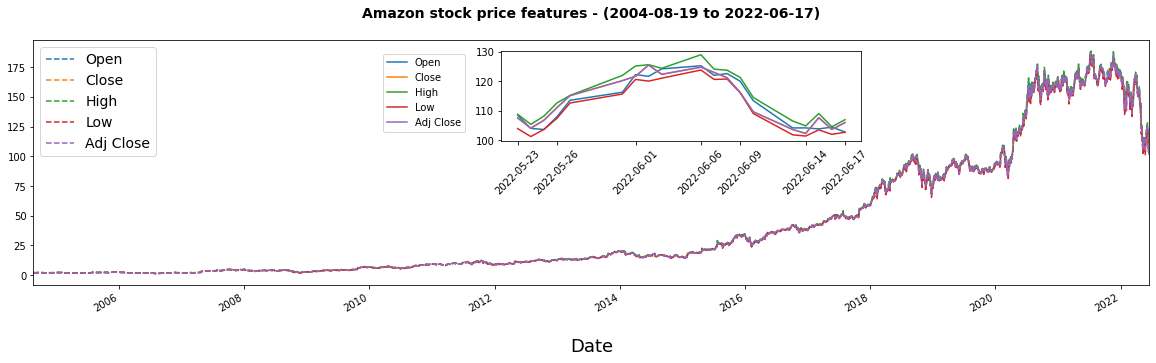

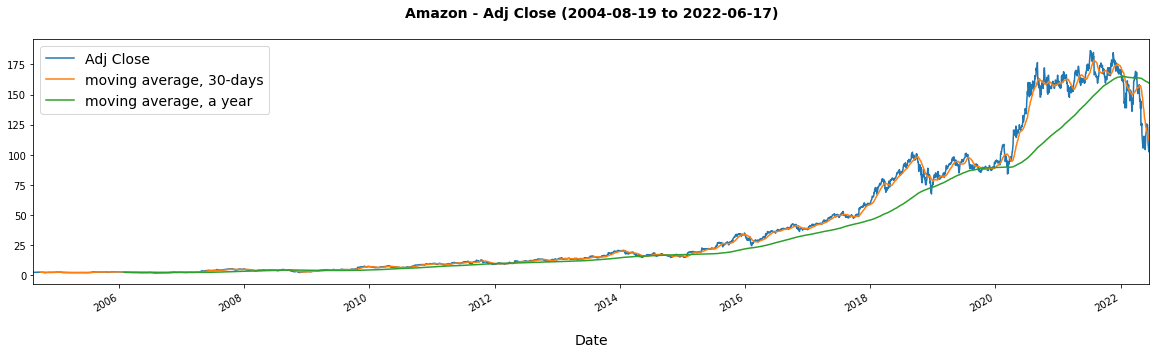

In [364]:
company_features_plot(company_ticker = 'AMZN', features = ['Open','Close','High','Low', 'Adj Close'])
company_trend_plot(company_ticker = 'AMZN', feature = 'Adj Close')

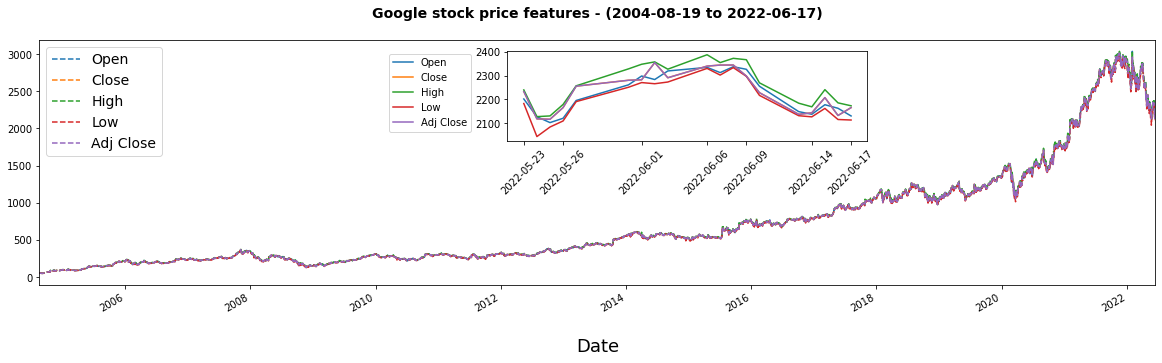

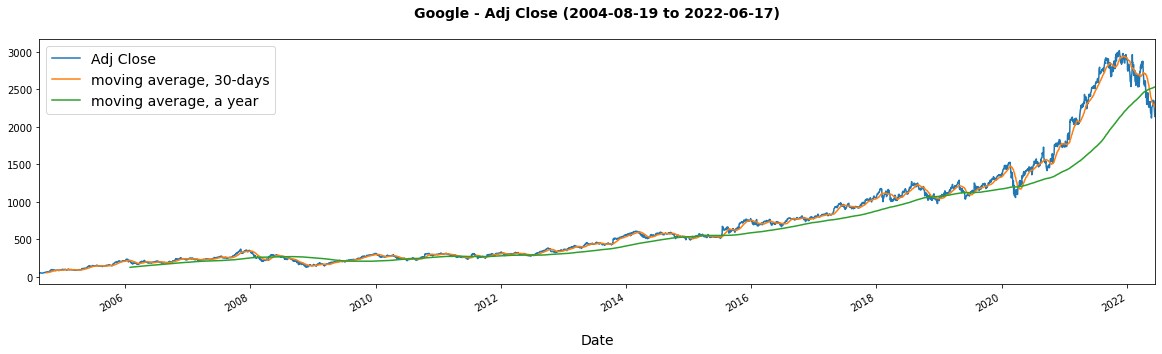

In [365]:
company_features_plot(company_ticker = 'GOOG', features = ['Open','Close','High','Low', 'Adj Close'])
company_trend_plot(company_ticker = 'GOOG', feature = 'Adj Close')

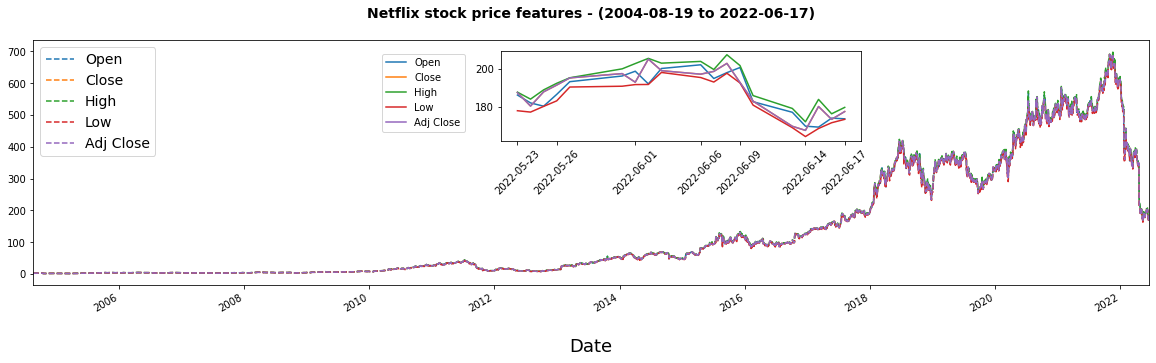

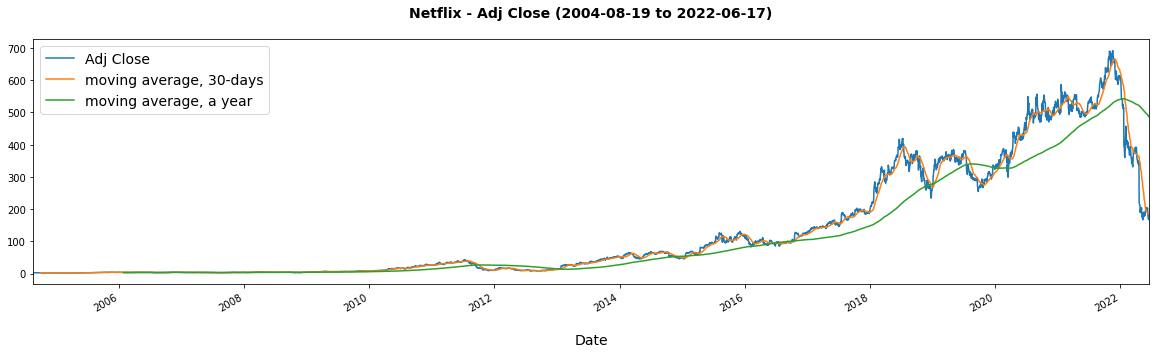

In [366]:
company_features_plot(company_ticker = 'NFLX', features = ['Open','Close','High','Low', 'Adj Close'])
company_trend_plot(company_ticker = 'NFLX', feature = 'Adj Close')

In [367]:
data = [go.Candlestick(x = df.index,
                       open = df[('Open', 'AMZN')],
                       close = df[('Adj Close', 'AMZN')],
                       high = df[('High', 'AMZN')],
                       low = df[('Low', 'AMZN')])]


fig = go.Figure(data)
fig.update_layout(xaxis_rangeslider_visible=False,width=900, height=500)
fig.show()

### **4.3. Comparing the maximum adjusted closing price of Google, Amazon and Netflix during February 2022**
<a name='max_adj'></a>

create and compare the bar plot of maximum adjusted closing share price of Amazon, Netflix and google in Feb 2022.


Date:  2022-02-28 



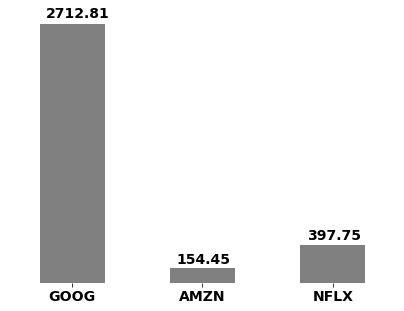

In [368]:
index_list = [i.strftime('%b%Y') for i in df.resample(rule='M').max().index]

fig , ax = plt.subplots(1,1, figsize=(7,5))
for row in df.resample(rule='M').max().index: 
  if row.strftime('%b%Y') == 'Feb2022':
    print('Date: ', row.date(), '\n')
    df.loc[row, 'Adj Close'].plot(kind = 'bar', color = 'gray')
    plt.xlabel('')
    sns.despine(left=True, bottom=True)
    plt.yticks([])
    for k in ax.get_xticks():
      plt.text(k-0.2,df.loc[row, 'High'][k]+50, df.loc[row, 'High'][k].round(2), fontdict={'fontsize':14, 'weight':'bold'})
    plt.xticks(ax.get_xticks(), label = list(df.loc[row, 'High'].index), weight = 'bold', fontsize=14, rotation=0)  
    plt.show()


# or
# df.resample(rule='M').max().loc['2022-02-28', 'Adj Close'].plot(kind = 'bar')

In [369]:
# different formats of datetime index
s = df.index[100]
print(s.strftime('%b'))
print(s.strftime('%B'))
print(s.strftime('%A'))
print(s.strftime('%a'))
print(s.strftime('%a%y'))
print(s.strftime('%a%Y'))

Jan
January
Tuesday
Tue
Tue05
Tue2005


## **5. Daily percentage return and volatility**
<a name = 'risk_assessment'></a>



### **5.1. Daily percentage return**
<a name='daily_return'></a>

Calculating daily percentage return for adjusted closing price at the end of the trading day. <br><br>

$\text{The daily return} = \large{\frac{\text{current day share price - previous day share price}}{\text{previous day share price}}}$

In [370]:
df[('Daily return %', 'GOOG')] = df.xs(key='Adj Close', level=0, axis=1)['GOOG'].pct_change(fill_method ='ffill')
df[('Daily return %', 'AMZN')] = df.xs(key='Adj Close', level=0, axis=1)['AMZN'].pct_change(fill_method ='ffill')
df[('Daily return %', 'NFLX')] = df.xs(key='Adj Close', level=0, axis=1)['NFLX'].pct_change(fill_method ='ffill')

In [371]:
df[['Adj Close' , 'Daily return %']].head(5)

Attributes  Adj Close                   Daily return %                    
Symbols          GOOG    AMZN      NFLX           GOOG      AMZN      NFLX
Date                                                                      
2004-08-19  49.982655  1.9315  2.264286            NaN       NaN       NaN
2004-08-20  53.952770  1.9755  2.262857       0.079430  0.022780 -0.000631
2004-08-23  54.495735  1.9725  2.272857       0.010064 -0.001519  0.004419
2004-08-24  52.239197  1.9525  2.208571      -0.041408 -0.010139 -0.028284
2004-08-25  52.802086  2.0150  2.238571       0.010775  0.032010  0.013583

In [372]:
# percentage change 2004/08/19 - 2004/08/20
(df['Adj Close'].iloc[1] - df['Adj Close'].iloc[0])/ df['Adj Close'].iloc[0]

Symbols
GOOG    0.079430
AMZN    0.022780
NFLX   -0.000631
dtype: float64

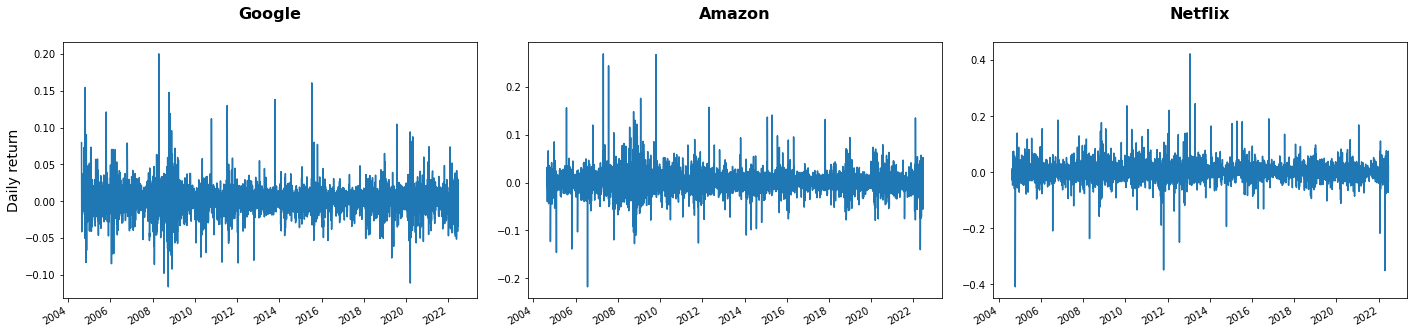

In [373]:
fig, ax = plt.subplots(1,3)
k=0
for col in df['Daily return %'].columns:
  df['Daily return %'][col].plot(figsize=(20,5), ax=ax[k])
  ax[k].set_xlabel('')
  if k == 0:
    ax[k].set_ylabel('Daily return', fontsize=14)

  if col == 'AMZN':
    ax[k].set_title('Amazon\n', fontsize=16, weight = 'bold')  
  elif col == 'GOOG':
    ax[k].set_title('Google\n', fontsize=16, weight = 'bold')
  elif col == 'NFLX':
    ax[k].set_title('Netflix\n', fontsize=16, weight = 'bold')      
  
  k += 1

plt.tight_layout(pad = 2)
plt.show()  

### **5.2. Daily volatility:** 
<a name='volatility'></a>

The standard deviation of the daily returns is calculated to determine [daily volatility](https://www.stockopedia.com/ratios/daily-volatility-12000/) as a measure of risk.

In [374]:
df[['Adj Close' , 'Daily return %']].describe().loc[['mean', 'std', 'min','25%', '50%', '75%', 'max']]

Attributes    Adj Close                         Daily return %            \
Symbols            GOOG        AMZN        NFLX           GOOG      AMZN   
mean         712.490099   40.430812  130.937888       0.001022  0.001182   
std          674.777918   51.368769  173.566035       0.019170  0.024183   
min           49.818268    1.303500    1.290000      -0.116091 -0.218220   
25%          248.377766    4.108125    5.265357      -0.007487 -0.009775   
50%          438.680710   14.350250   38.227142       0.000760  0.000669   
75%         1029.130005   60.105374  195.117504       0.010022  0.012208   
max         3014.179932  186.570496  691.690002       0.199915  0.269497   

Attributes            
Symbols         NFLX  
mean        0.001534  
std         0.033243  
min        -0.409065  
25%        -0.013431  
50%         0.000372  
75%         0.015996  
max         0.422235

In [375]:
df.resample(rule='Y').mean()

Attributes    Adj Close                                Close              \
Symbols            GOOG        AMZN        NFLX         GOOG        AMZN   
Date                                                                       
2004-12-31    75.617206    1.972660    1.898739    75.617206    1.972660   
2005-12-31   138.360933    1.994855    2.597262   138.360933    1.994855   
2006-12-31   204.824916    1.795466    3.690996   204.824916    1.795466   
2007-12-31   268.369305    3.361474    3.123933   268.369305    3.361474   
2008-12-31   231.558071    3.494002    4.094670   231.558071    3.494002   
2009-12-31   219.023214    4.364091    6.322035   219.023214    4.364091   
2010-12-31   266.811472    6.957020   16.824172   266.811472    6.957020   
2011-12-31   283.424738    9.833601   27.493719   283.424738    9.833601   
2012-12-31   320.208021   11.015182   11.855057   320.208021   11.015182   
2013-12-31   440.470378   14.901579   35.271831   440.470378   14.901579   
2014-12-31   559.803290   16.627552   57.495119   559.803290   16.627552   
2015-12-31   602.005681   23.906915   91.895674   602.005681   23.906915   
2016-12-31   743.486707   34.976157  102.030357   743.486707   34.976157   
2017-12-31   921.780837   48.408351  165.374263   921.780837   48.408351   
2018-12-31  1113.225134   82.086309  319.290319  1113.225134   82.086309   
2019-12-31  1188.393057   89.459460  328.872380  1188.393057   89.459460   
2020-12-31  1481.403811  134.042755  446.827233  1481.403811  134.042755   
2021-12-31  2510.613731  167.193349  558.217697  2510.613731  167.193349   
2022-12-31  2560.170957  141.859427  328.579052  2560.170957  141.859427   

Attributes                     High                                  Low  ...  \
Symbols           NFLX         GOOG        AMZN        NFLX         GOOG  ...   
Date                                                                      ...   
2004-12-31    1.898739    77.061209    2.005420    1.958055    74.198217  ...   
2005-12-31    2.597262   139.973777    2.019069    2.654184   136.640635  ...   
2006-12-31    3.690996   207.433365    1.820769    3.753768   202.402461  ...   
2007-12-31    3.123933   271.072301    3.407827    3.178617   265.502818  ...   
2008-12-31    4.094670   236.284998    3.588350    4.199983   227.483640  ...   
2009-12-31    6.322035   221.164850    4.428938    6.434314   216.423850  ...   
2010-12-31   16.824172   269.464070    7.045464   17.138815   264.402920  ...   
2011-12-31   27.493719   286.110425    9.973744   28.021151   280.751840  ...   
2012-12-31   11.855057   322.927847   11.133972   12.124200   317.288286  ...   
2013-12-31   35.271831   443.407307   15.046300   35.875658   437.217431  ...   
2014-12-31   57.495119   564.495206   16.815877   58.287222   555.162255  ...   
2015-12-31   91.895674   607.442765   24.159812   93.412296   596.090603  ...   
2016-12-31  102.030357   749.421629   35.290248  103.569524   737.597905  ...   
2017-12-31  165.374263   926.898963   48.725938  167.048725   915.331412  ...   
2018-12-31  319.290319  1125.777606   83.141992  325.219322  1101.001658  ...   
2019-12-31  328.872380  1196.787599   90.129504  332.998691  1178.523734  ...   
2020-12-31  446.827233  1499.179412  135.847069  454.320039  1462.068905  ...   
2021-12-31  558.217697  2531.339060  168.943683  565.129443  2487.311799  ...   
2022-12-31  328.579052  2599.950625  144.534082  336.344138  2526.517590  ...   

Attributes                     Open                                Volume  \
Symbols           NFLX         GOOG        AMZN        NFLX          GOOG   
Date                                                                        
2004-12-31    1.856778    75.433321    1.971968    1.913283  1.822185e+07   
2005-12-31    2.540368   138.347175    1.991020    2.596978  2.145846e+07   
2006-12-31    3.631736   205.180217    1.793612    3.692254  1.704875e+07   
2007-12-31    3.066096   268.407866    3.355741    3.123734  1.091880e+07   
2008-

Using histogram, plot the distribution of daily and monthly return of Amazon(kind='hist'). Divide the data range to 50 (bins=50). Histogram also shows how extreme the returns can be.

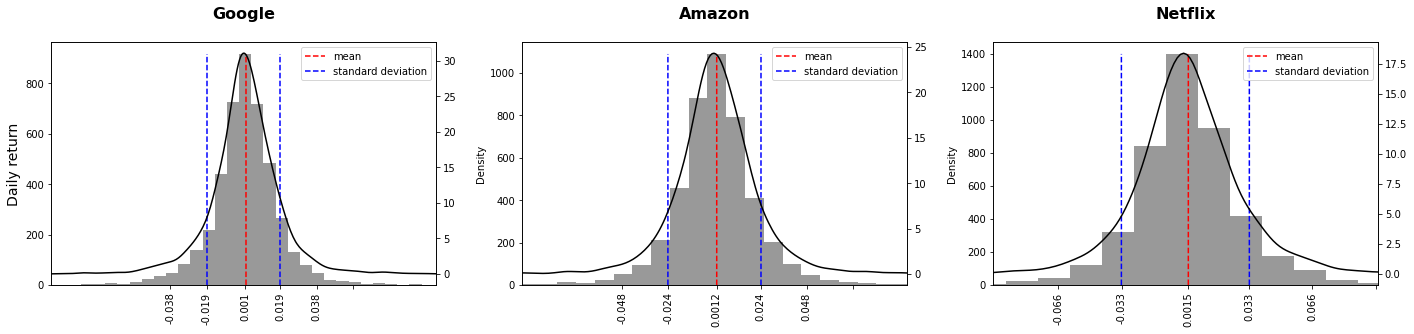

In [376]:
fig, ax = plt.subplots(1,3)
k=0
for col in df['Daily return %'].columns:
  L = df[('Daily return %')][col].value_counts(bins=50).values.max()
  ax[k].plot(np.ones(L) * df[('Daily return %')][col].mean(), range(L), ls = '--', color='r', label = 'mean')
  ax[k].plot(np.ones(L) * df[('Daily return %')][col].std(), range(L), ls = '--', color='b', label = 'standard deviation')
  ax[k].plot(np.ones(L) * -df[('Daily return %')][col].std(), range(L), ls = '--', color='b')
  df['Daily return %'][col].plot(kind = 'hist', bins=50, figsize=(20,5), ax=ax[k], alpha=0.4, colormap = 'gray', label = '')
  df[('Daily return %')][col].plot(kind='kde', figsize=(20,5), ax=ax[k], secondary_y=True, colormap='gray', label = '')
  ax[k].set_xlabel('')
  if k == 0:
    ax[k].set_ylabel('Daily return', fontsize=14)

  if col == 'AMZN':
    ax[k].set_title('Amazon\n', fontsize=16, weight = 'bold')  
  elif col == 'GOOG':
    ax[k].set_title('Google\n', fontsize=16, weight = 'bold')
  elif col == 'NFLX':
    ax[k].set_title('Netflix\n', fontsize=16, weight = 'bold')      
  
  ax[k].set_xlim(-0.1,0.1)
  ax[k].legend()
  STD = round(df[('Daily return %')][col].std(),3)
  MEAN = round(df[('Daily return %')][col].mean(),4)
  ax[k].set_xticks([-2*STD, -STD, MEAN, STD,2*STD, 3*STD])
  ax[k].set_xticklabels([-2*STD, -STD, MEAN, STD,2*STD], rotation=90)
  k += 1

plt.tight_layout(pad = 2)
plt.show() 

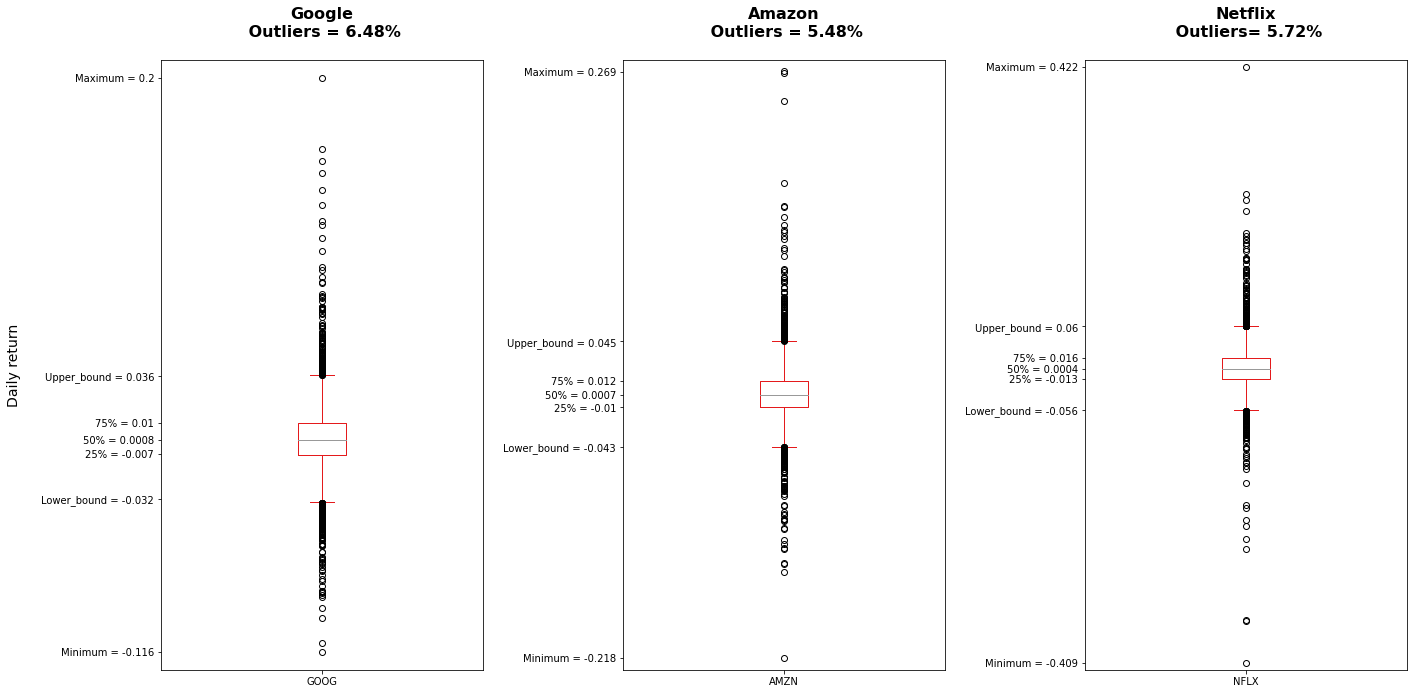

In [377]:
fig, ax = plt.subplots(1,3)
k=0
for col in df['Daily return %'].columns:
  df['Daily return %'][col].plot(kind = 'box', figsize=(20,10), ax=ax[k], colormap = 'Set1')
  ax[k].set_xlabel('')
  if k == 0:
    ax[k].set_ylabel('Daily return\n', fontsize=14)    
  
  MEDIAN = round(df[('Daily return %')][col].quantile(q=0.5),4)
  perct_25 = round(df[('Daily return %')][col].quantile(q=0.25),3)
  perct_75 = round(df[('Daily return %')][col].quantile(q=0.75),3)
  MAX = round(df[('Daily return %')][col].max(),3)
  MIN = round(df[('Daily return %')][col].min(),3)
  IQR = abs(perct_25 - perct_75) 
  Upper_bound = round(1.5 * IQR + perct_75,3)
  Lower_bound = round(-1.5 * IQR + perct_25,3)  
  ax[k].set_yticks([MIN, Lower_bound, perct_25, MEDIAN, perct_75, Upper_bound, MAX])
  ax[k].set_yticklabels([f'Minimum = {MIN}', 
                         f'Lower_bound = {Lower_bound}', 
                         f'25% = {perct_25}', 
                         f'50% = {MEDIAN}', 
                         f'75% = {perct_75}', 
                         f'Upper_bound = {Upper_bound}', 
                         f'Maximum = {MAX}'], rotation=0)
  
  Outliers = df[(df['Daily return %'][col]>Upper_bound) | (df['Daily return %'][col]<Lower_bound)]
  Outlier_percent = round(len(Outliers)*100/len(df), 2)

  if col == 'AMZN':
    ax[k].set_title(f'Amazon\n Outliers = {Outlier_percent}%\n', fontsize=16, weight = 'bold')  
  elif col == 'GOOG':
    ax[k].set_title(f'Google\n Outliers = {Outlier_percent}%\n', fontsize=16, weight = 'bold')
  elif col == 'NFLX':
    ax[k].set_title(f'Netflix\n Outliers= {Outlier_percent}%\n', fontsize=16, weight = 'bold')  
  
  ax[k].set_ylim(MIN-0.01, MAX+0.01)
  k += 1

plt.tight_layout(pad = 2)
plt.show()

### **5.3. Cumulative sum of daily pecentage return**
<a name = 'cumsum_daily_return'></a>

Calculate and plot the cumulative sum of daily return. This will show the growth of investment or total return.

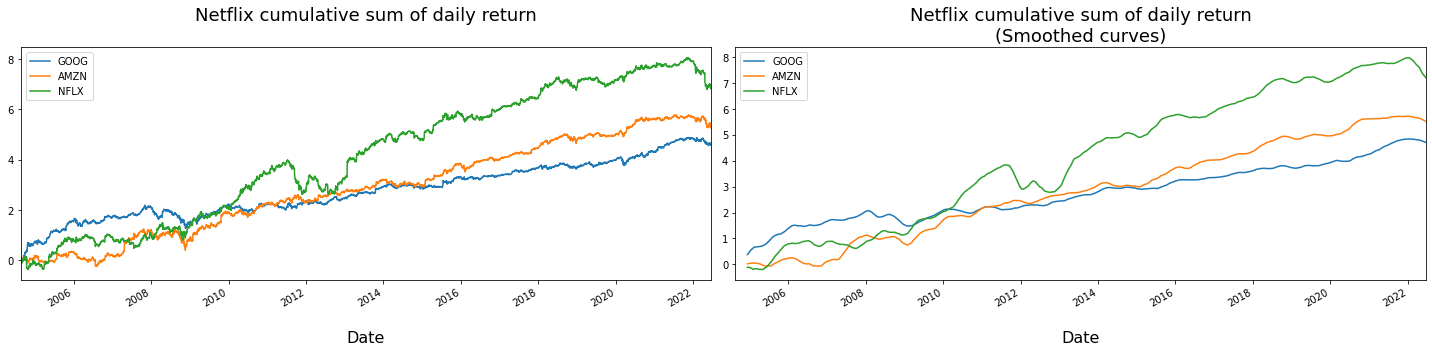

In [378]:
fig, ax = plt.subplots(1,2,figsize=(20,5))

for col in df['Daily return %'].columns: 
  df[('Daily return %')][col].cumsum().plot(ax=ax[0])
  df[('Daily return %')][col].cumsum().rolling(window=80).mean().plot(ax=ax[1])

  ax[0].set_xlabel('\nDate', fontsize=16)
  ax[1].set_xlabel('\nDate', fontsize=16)

  if col == 'AMZN':
    company_name = 'Amazon'
  elif col == 'NFLX':
    company_name = 'Netflix'  
  elif col == 'GOOG':
    company_name = 'Google'

  ax[0].set_title(f'{company_name} cumulative sum of daily return\n', fontsize=18)
  ax[0].legend()
  ax[0].set_xlim(df.index[0], df.index[-1])
  
  ax[1].set_title(f'{company_name} cumulative sum of daily return\n(Smoothed curves)', fontsize=18)
  ax[1].legend()
  ax[1].set_xlim(df.index[0], df.index[-1])

plt.tight_layout()
plt.show()

## **6. Correlation between daily return of Amazon, Netflix and Google as well as their adjusted closing price.**
<a name = 'Corr'></a>

Calculate the correlation between the return of Netflix and Amazon and create its heatmap.


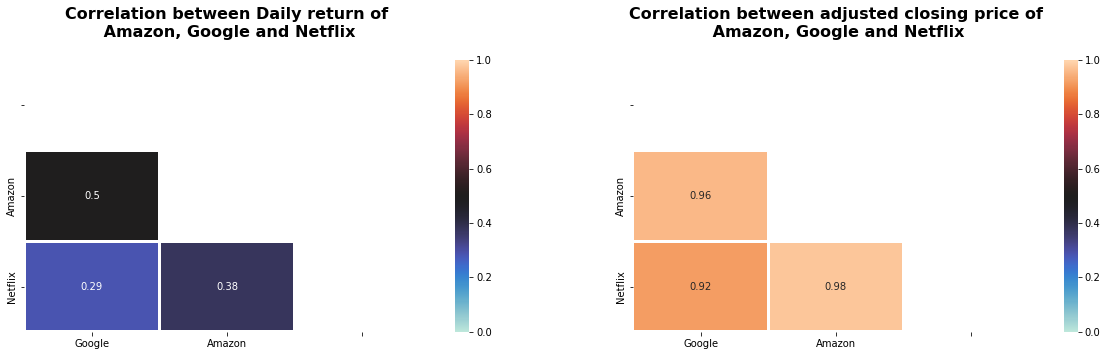

In [379]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
mask = df['Adj Close'].pct_change(freq='M',fill_method='ffill').corr()==1
mask = np.triu(df['Adj Close'].pct_change(freq='D',fill_method='ffill').corr(), k=0)

Ticks = df['Adj Close'].pct_change(freq='M',fill_method='ffill').corr().columns

sns.heatmap(df['Adj Close'].pct_change(fill_method='ffill').corr(),annot=True, 
            mask = mask, ax = ax[0],center=0.5, vmin=0, vmax=1, linewidths=2, square=False)

ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_title('Correlation between Daily return of\n Amazon, Google and Netflix\n', fontsize=16, weight='bold')

sns.heatmap(df['Adj Close'].corr(),annot=True, ax = ax[1],mask=mask,center=0.5, vmin=0, vmax=1,linewidths=2,square=False)

ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_title('Correlation between adjusted closing price of\n Amazon, Google and Netflix\n', fontsize=16, weight='bold')

ax[1].set_xticklabels(['Google', 'Amazon' , ''])
ax[1].set_yticklabels(['', 'Amazon' , 'Netflix'])

ax[0].set_xticklabels(['Google', 'Amazon' , ''])
ax[0].set_yticklabels(['', 'Amazon' , 'Netflix'])


plt.show()

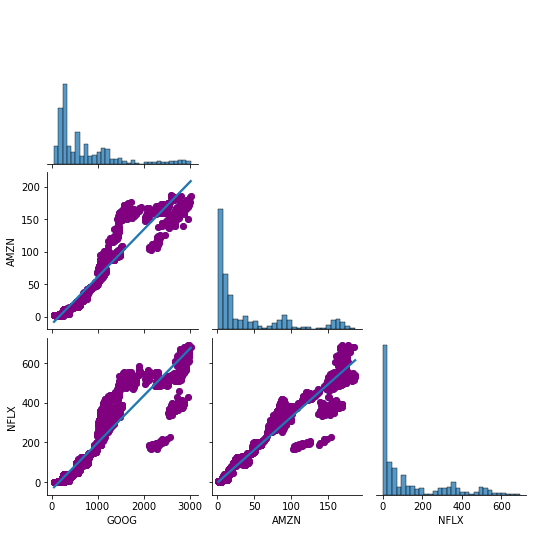

In [380]:
fig = sns.pairplot(df.xs(key='Adj Close', level=0, axis=1),diag_kind='hist', kind='reg', corner=True)
fig.map_lower(plt.scatter,color='purple')
plt.show()

### **7. Return of Investment**
<a name='ROI'></a>

### **7.1. Return of investment calculator:**
<a name='ROI_calculator'></a>

**analyze and compare the stock performance of Amazon with Netflix by calculating their return. How much is the return If one had invested 1000$ in 2012 in either of these companies.**

In [381]:
from datetime import timedelta
previous_date = '2012-12-31'
investment = 1000
def profit_calculator(company_ticker, initial_investment, initial_investment_year):
    current_day = datetime.strftime(datetime.today().date() + timedelta(-1), '%Y-%m-%d')
    n = datetime.today().year - int(initial_investment_year)
    data = pdr.DataReader(company_ticker, 'yahoo',start='2005-01-01', end=current_day)
    current_day_price = data['Adj Close'].loc[current_day]
    resampled_data = data.resample(rule='BY').mean()
    index=np.where(data.resample(rule='BY').mean().index.year.astype(str) == initial_investment_year)[0][0]
    previous_date_price = data['Adj Close'].resample('BA').mean().iloc[index]
    total_increase = (current_day_price - previous_date_price)/previous_date_price
    profit = total_increase*initial_investment
    current_money = initial_investment + profit
    daily_return_ave = data['Adj Close'].iloc[index:].pct_change(freq='D').dropna().mean()
    daily_return_std = data['Adj Close'].iloc[index:].pct_change(freq='D').dropna().std()

    annual_return = pow((initial_investment/current_money),(1/n))-1
    return daily_return_ave, daily_return_std, annual_return,total_increase, profit, current_money

In [479]:
initial_investment=1000
initial_investment_year='2020'

daily_return_ave, daily_return_std, annual_return, total_increase, profit, current_money = profit_calculator(company_ticker = 'AMZN', 
                                                                             initial_investment=1000, 
                                                                             initial_investment_year='2020')
print(f"""
If you had invested ${initial_investment} in {company_name} stock in {initial_investment_year}, 
today your investment  would worth {current_money : .2f}.
profit = {profit: .2f}
Total_increase = {total_increase*100: .2f}%
Daily return average = {daily_return_ave*100: .2f}%
volatility (risk) = {daily_return_std*100: .2f}%""")
#Annual_return = {annual_return*100: .2f}%


If you had invested $1000 in Netflix stock in 2020, 
today your investment  would worth  773.34.
profit = -226.66
Total_increase = -22.67%
Daily return average =  0.12%
volatility (risk) =  2.47%


### **7.2 Comparing the Return of investment of Amazon, Neflix and Google**
<a name='ROI_Comparison'></a>

In [480]:
ROI = {'Company_name' : [],
       'Initial Investment Year' : [],
       '$ Initial Investment' : [],
       '$ Returned Money' :[],
       '$ Profit' : [],
       '% Total Increase' : [],
       '% Daily_return': [],
       '% Daily_volatility (risk)': []}
    #  '% Annual_return': []


ticker_list = ['AMZN', 'GOOG', 'NFLX'] 
initial_investment=1000
initial_investment_year_list=['2012', '2017' ,'2020']
for ticker in ticker_list:
  for yr in initial_investment_year_list:
    daily_return_ave, daily_return_std, annual_return, total_increase, profit, current_money = profit_calculator(company_ticker = ticker,
                                                                                 initial_investment=1000, 
                                                                                 initial_investment_year=yr)   

    if ticker == 'AMZN':
      Company_name = 'Amazon'
    elif ticker == 'GOOG':
      Company_name = 'Google'  
    elif ticker == 'NFLX':
      Company_name = 'Netflix'  

    ROI['Company_name'].append(Company_name) 
    ROI['Initial Investment Year'].append(yr)
    ROI['$ Initial Investment'].append(f'$ {initial_investment}'),
    ROI['$ Returned Money'].append(round(current_money,2))
    ROI['$ Profit'].append(round(profit,2))
    ROI['% Total Increase'].append(round(total_increase*100,2))
    #ROI['% Annual_return'].append(round(annual_return*100,2))
    ROI['% Daily_return'].append(round(daily_return_ave*100,2))
    ROI['% Daily_volatility (risk)'].append(round(daily_return_std*100,2))

ROI = pd.DataFrame(ROI)
ROI_grouped = pd.pivot_table(ROI, index=['Initial Investment Year', 'Company_name'])

print(f"""The following table compares return of investment of ${initial_investment} in Amazon, Netflix and Google after 2, 5 and 10 years""")

display(ROI_grouped)

The following table compares return of investment of $1000 in Amazon, Netflix and Google after 2, 5 and 10 years


$ Profit  $ Returned Money  \
Initial Investment Year Company_name                               
2012                    Amazon         8410.65           9410.65   
                        Google         5660.42           6660.42   
                        Netflix       13622.45          14622.45   
2017                    Amazon         1141.37           2141.37   
                        Google         1313.70           2313.70   
                        Netflix          48.23           1048.23   
2020                    Amazon         -226.66            773.34   
                        Google          439.66           1439.66   
                        Netflix        -612.04            387.96   

                                      % Daily_return  \
Initial Investment Year Company_name                   
2012                    Amazon                  0.12   
                        Google                  0.10   
                        Netflix                 0.16   
2017                    Amazon                  0.12   
                        Google                  0.10   
                        Netflix                 0.16   
2020                    Amazon                  0.12   
                        Google                  0.10   
                        Netflix                 0.16   

                                      % Daily_volatility (risk)  \
Initial Investment Year Company_name                              
2012                    Amazon                             2.47   
                        Google                             1.86   
                        Netflix                            3.36   
2017                    Amazon                             2.47   
                        Google                             1.86   
                        Netflix                            3.36   
2020                    Amazon                             2.47   
                        Google                             1.86   
                        Netflix                            3.36   

                                      % Total Increase  
Initial Investment Year Company_name                    
2012                    Amazon                  841.06  
                        Google                  566.04  
                        Netflix                1362.25  
2017                    Amazon                  114.14  
                        Google                  131.37  
                        Netflix                   4.82  
2020                    Amazon                  -22.67  
                        Google                   43.97  
                        Netflix                 -61.20

In [ ]:
#df['Adj Close'].loc['2012-01-01':].resample('BA').apply(pd.Series.pct_change).resample('BA').sum().mul(100)
#df['Adj Close']['AMZN'].loc['2012-01-01':].pct_change().resample(rule='BA').sum()*100